In [1]:
import matplotlib.pylab as plt
import matplotlib as mpl
mpl.rcParams['mathtext.fontset'] = 'cm'
%config InlineBackend.figure_format = 'retina'
import numpy as np
import numba

$$H(p,q)=\frac{p^2}{2m}+D\left(1-\exp \left(-a\left(q-q_{0}\right)\right)\right)^{2}$$

In [2]:
class pair:
    def __init__(self,p10,q10,p20,q20,dt):
        self.q1=q10
        self.p1=p10
        self.q2=q20
        self.p2=p20
        self.dt=dt
        self.a=0.18
        self.D=15.
        self.m=1.
        self.q1_tr=np.array([])
        self.p1_tr=np.array([])
        self.q2_tr=np.array([])
        self.p2_tr=np.array([])
    def dhdp(self,p,q):
        return p/self.m
    def dhdq(self,p,q):
        return 2.*self.D*self.a*(np.exp(-self.a*q)-np.exp(-2*self.a*q))
    def H(self,p,q):
        return p**2/(2*self.m)+self.D*(1-np.exp(-self.a*q))**2.
    def timestep(self):
        self.p1-=self.dhdq(self.p1,self.q1)*self.dt
        self.q1+=self.dhdp(self.p1,self.q1)*self.dt
        self.p2-=self.dhdq(self.p2,self.q2)*self.dt
        self.q2+=self.dhdp(self.p2,self.q2)*self.dt
    def dynamics(self,N):
        for i in range(N):
            self.timestep()
            self.q1_tr=np.append(self.q1_tr,self.q1)
            self.p1_tr=np.append(self.p1_tr,self.p1)
            self.q2_tr=np.append(self.q2_tr,self.q2)
            self.p2_tr=np.append(self.p2_tr,self.p2)
    def midpoint(self):
        return 0.5*(self.q1_tr+self.q2_tr),0.5*(self.p1_tr+self.p2_tr)

In [3]:
test=pair(1,3,2,6,0.01)

In [4]:
%%time
test.dynamics(20000)

CPU times: user 1.06 s, sys: 34.6 ms, total: 1.09 s
Wall time: 1.1 s


In [5]:
q,p=test.midpoint()

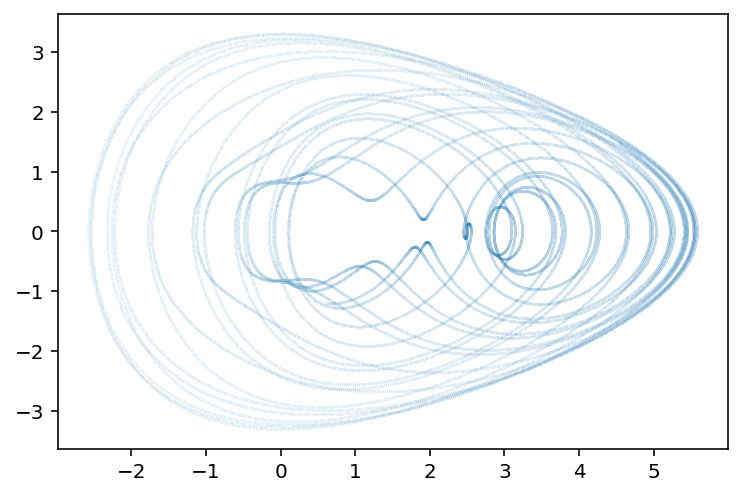

In [6]:
plt.plot(q,p,'.',markersize=0.1)